<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-a-noisy-signal" data-toc-modified-id="Create-a-noisy-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create a noisy signal</a></span></li><li><span><a href="#Windowing-Average" data-toc-modified-id="Windowing-Average-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Windowing Average</a></span></li><li><span><a href="#Exponential-Moving-Average-(EMA)" data-toc-modified-id="Exponential-Moving-Average-(EMA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exponential Moving Average (EMA)</a></span></li><li><span><a href="#EMA-With-Bias-Correction" data-toc-modified-id="EMA-With-Bias-Correction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EMA With Bias Correction</a></span></li></ul></div>

In [2]:
import torch

import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(context="talk")

## Create a noisy signal

In [3]:
x = torch.linspace(0, 10, 100)
y = torch.sin(x) + torch.randn_like(x) * 0.5

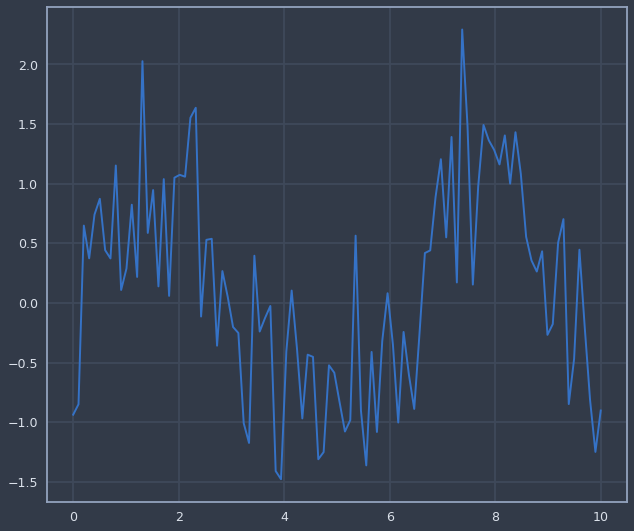

In [4]:
_ = plt.plot(x, y)

## Windowing Average

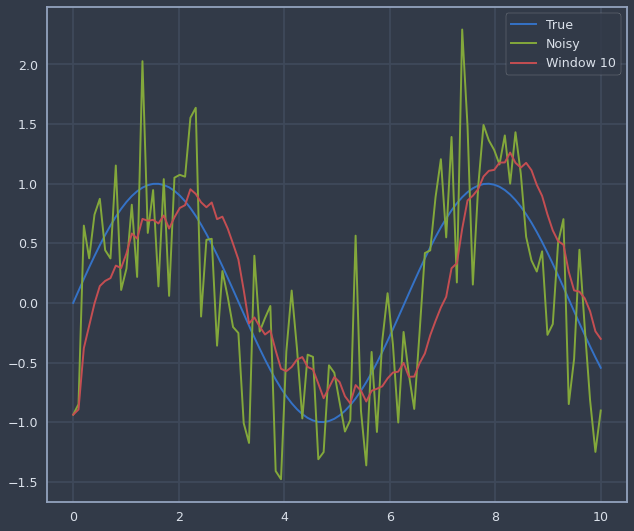

In [5]:
wsize = 10
vals = [0] * wsize

y_smooth = []

for i, yval in enumerate(y):
    vals[i % len(vals)] = yval
    # This can be optimized a bit
    y_avg = sum(vals[:i+1]) / len(vals[:i+1])
    y_smooth.append(y_avg)

plt.plot(x, torch.sin(x), label="True")
plt.plot(x, y, label="Noisy")
plt.plot(x, y_smooth, label=f"Window {wsize}")
_ = plt.legend()

## Exponential Moving Average (EMA)

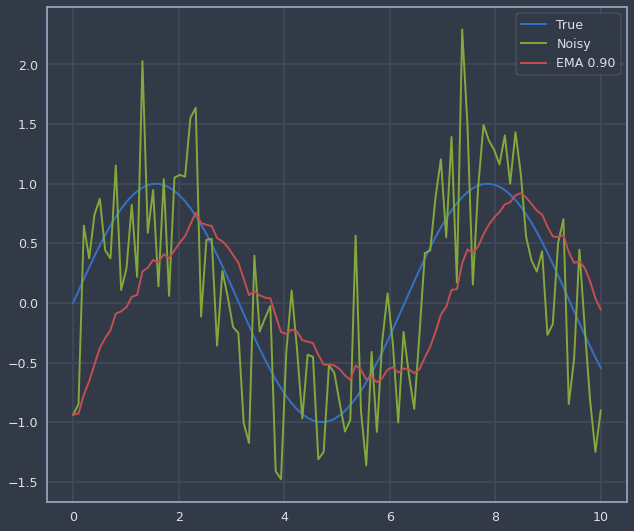

In [8]:
y_ema = [y[0]]
beta = 0.9

for yval in y[1:]:
    new_y_ema = beta * y_ema[-1] + (1 - beta) * yval
    y_ema.append(new_y_ema)

plt.plot(x, torch.sin(x), label="True")
plt.plot(x, y, label="Noisy")
plt.plot(x, y_ema, label=f"EMA {beta:.2f}")
_ = plt.legend()

## EMA With Bias Correction

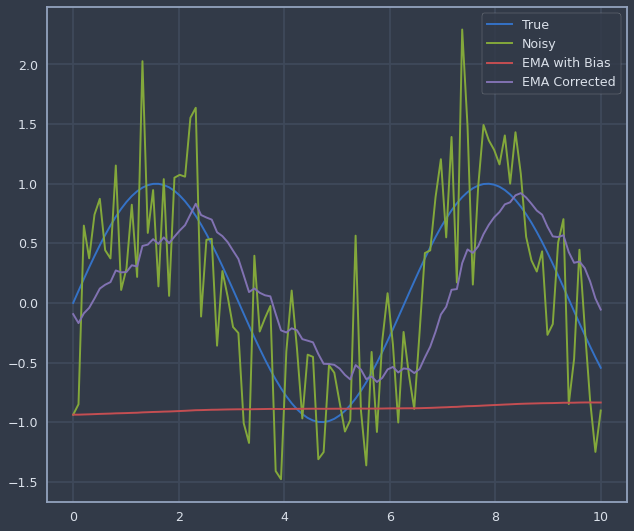

In [7]:
y_ema_corrected = [0]
beta = 0.9

for t, yval in enumerate(y):
    new_y_ema = beta * y_ema_corrected[-1] + (1 - beta) * yval
    new_y_ema_t = new_y_ema / (1 - beta ** (t + 1))
    y_ema_corrected.append(new_y_ema)

plt.plot(x, torch.sin(x), label='True')
plt.plot(x, y, label='Noisy')
plt.plot(x, y_ema, label='EMA with Bias')
plt.plot(x, y_ema_corrected[1:], label='EMA Corrected')
_ = plt.legend()